In [47]:
import warnings
warnings.simplefilter("ignore")
from IPython.core.display import HTML
def css_styling():
    styles = """
<style>
.output_png { text-align:  center; }
</style>
    """
    return HTML(styles)
css_styling()

import matplotlib
import matplotlib.pyplot as pl
import seaborn.apionly as sns

%matplotlib inline

%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


<center>
Marcin Junczys-Dowmunt <br/><br/>Machine Translation Marathon 2016<br/><br/>
</center>

# Introduction to Neural Networks

## Prolog 2: Logistic Regression

# The Iris Data Set

<table style="border: 0">
<tr style="border: 0">
<td style="border: 0"><img width="300" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg"/>
Iris setosa
</td>
<td style="border: 0"><img width="300" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"/>Iris virginica</td>
<td style="border: 0"><img width="300" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"/>Iris vericolor</td>
<tr/>
</table>

In [ ]:
import pandas
data = pandas.read_csv("iris.csv", header=None, 
                       names=["Sepal length", "Sepal width", 
                              "Petal length", "Petal width", 
                              "Species"])
data[:8]

$$\textrm{Set of classes: } \qquad C = \{ c_1, c_2, \cdots, c_k \} \qquad |C| = k$$

$$ \textrm{Training data:}\\
X = \left[
\begin{array}{ccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)}\\
1 & x_1^{(2)} & \cdots & x_n^{(2)}\\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & \cdots & x_n^{(m)}\\
\end{array}
\right]\quad
\vec{y} = \left[\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots \\
y^{(m)}\\
\end{array}
\right]= \left[\begin{array}{c}
c_2\\
c_1\\
\vdots \\
c_{1}\\
\end{array}
\right]$$

$$
\dim{X} = m \times (n+1) \qquad \dim{\vec{y}} = m \times 1
$$

$$\textrm{Set of classes: } \qquad C = \{ c_1, c_2, \cdots, c_k \} \qquad |C| = k$$

$$ \textrm{Training data (with indicator matrix):}\\
X = \left[
\begin{array}{ccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)}\\
1 & x_1^{(2)} & \cdots & x_n^{(2)}\\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & \cdots & x_n^{(m)}\\
\end{array}
\right]\qquad
Y = \left[\begin{array}{c}
\delta(c_1, y^{(1)}) & \ldots & \delta(c_k, y^{(1)})\\
\delta(c_1, y^{(2)}) & \ldots & \delta(c_k, y^{(2)})\\
\vdots & \ddots & \vdots \\
\delta(c_1, y^{(m)}) & \ldots & \delta(c_k, y^{(m)})\\
\end{array}
\right]$$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{if } x=y \\ 0 & \textrm{otherwise}\end{array}\right.$$

$$
\dim{X} = m \times (n+1) \qquad \dim{Y} = m \times k
$$

In [ ]:
import numpy as np

m = len(data)
X = np.matrix(data[["Sepal length", "Sepal width", 
                   "Petal length", "Petal width"]])
X = np.hstack((np.ones(m).reshape(m,1), X))

y = np.matrix(data[["Species"]]).reshape(m,1)

def mapY(y, c):
    n = len(y)
    yBi = np.matrix(np.zeros(n)).reshape(n, 1)
    yBi[y == c] = 1.
    return yBi

def indicatorMatrix(y):
    classes = np.unique(y.tolist())
    Y = mapY(y, classes[0])
    for c in classes[1:]:
        Y = np.hstack((Y, mapY(y, c)))
    Y = np.matrix(Y).reshape(len(y), len(classes))
    return Y
     
Y = indicatorMatrix(y)
print(Y[:10])

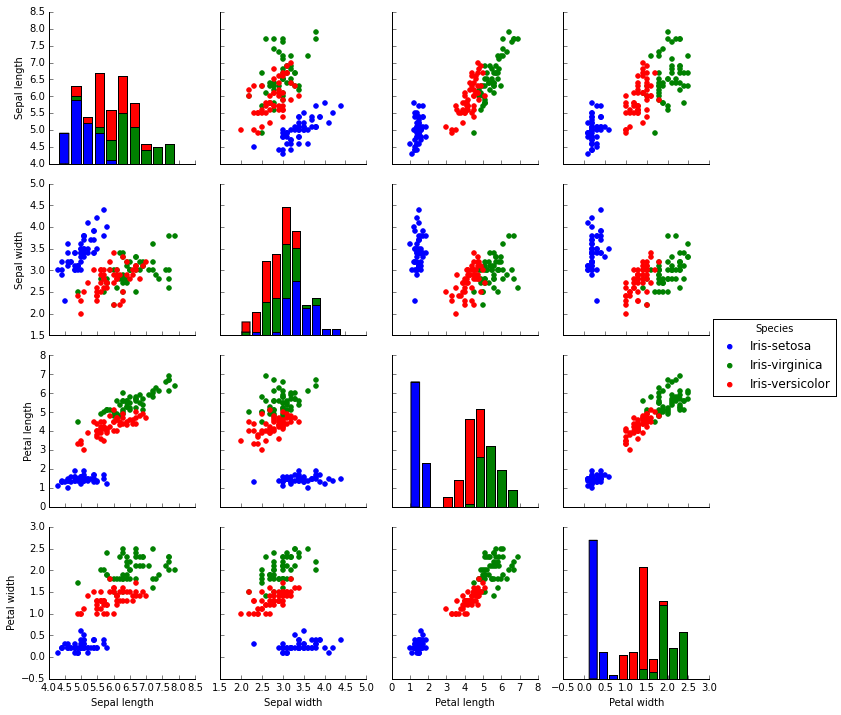

In [50]:
g = sns.pairplot(data, hue="Species") 

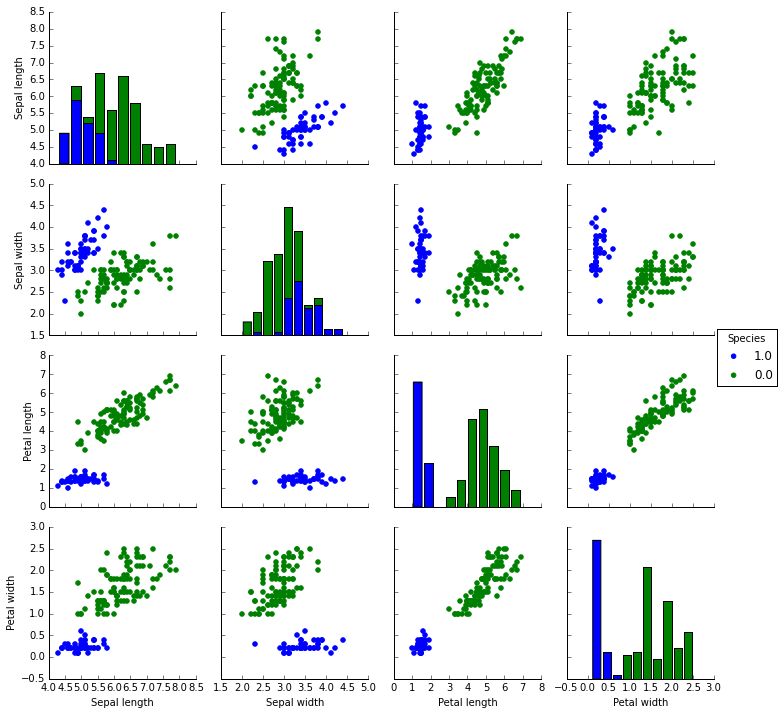

In [51]:
testClass = 0
Y0 = Y[:,testClass]

data0 = np.concatenate((X, Y0), axis=1)
df = pandas.DataFrame(data0[:,1:])
df.columns = data.columns
g = sns.pairplot(df, vars=[c for c in data.columns if c != "Species"], 
                 hue="Species")

##Logistic function: 

$$g(x) = \dfrac{1}{1+e^{-x}} $$


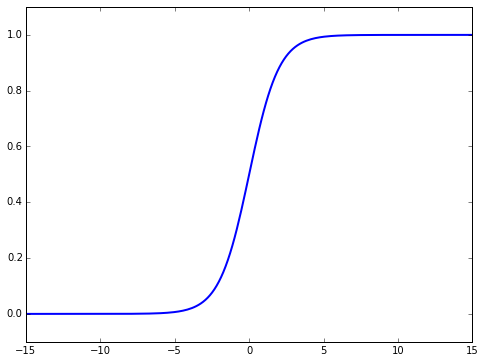

In [52]:
def logistic(x):
    return 1.0/(1.0 + np.exp(-x))

x = np.linspace(-15,15,200)
y = logistic(x)
fig = pl.figure(figsize=(8,6))
ax = fig.add_subplot(111)
pl.ylim(-.1,1.1)
ax.plot(x, y, linewidth='2');

## Logistic regression model

* For a single feature vector: $$h_\theta(x) = g(\sum_{i=0}^{n}\theta_i x_i) = \dfrac{1}{1+e^{-\sum_{i=0}^{n}\theta_i x_i}}$$

* More compact in matrix form (batched): $$h_\theta(X) = g(X\theta) = \dfrac{1}{1+e^{-X\theta}}$$

## The cost function (binary cross-entropy)

* Computed across the training batch:

$$ J(\theta) = -\dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log h_\theta(x^{(i)})+ (1-y^{(i)}) \log (1-h_\theta(x^{(i)}))]$$

* Essentially the same in matrix form with vectorized elementary functions

## And its gradient

* Computed across the training batch for a single parameter:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

* In matrix form:
$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(h_\theta(X)-\vec y\right)$$

* Looks the same as for linear regression, how come?

In [53]:
def h(theta, X):
    return 1.0/(1.0 + np.exp(-X*theta))

def J(h,theta,X,y):
    m = len(y)
    s1 = np.multiply(y, np.log(h(theta,X)))
    s2 = np.multiply((1 - y), np.log(1 - h(theta,X)))
    return -np.sum(s1 + s2, axis=0)/m

def dJ(h,theta,X,y):
    return 1.0/len(y)*(X.T*(h(theta,X)-y)) 

In [ ]:
# Divide data into train and test set
XTrain, XTest = X[:100], X[100:]
YTrain, YTest = Y[:100], Y[100:]

# Initialize theta with zeroes
theta = np.zeros(5).reshape(5,1)

# Select only first column for binary classification (setosa vs. rest)
YTrain0 = YTrain[:,0]

print(J(h, theta, XTrain, YTrain0))
print(dJ(h, theta, XTrain, YTrain0))

## Let's plug them into SGD

In [ ]:
def mbSGD(h, fJ, fdJ, theta, X, y, 
         alpha=0.01, maxSteps=10000, batchSize = 10):
    i = 0
    b = batchSize
    m = X.shape[0]
    while i < maxSteps:
        start = (i*b) % m
        end   = ((i+1)*b) % m
        if(end <= start):
            end = m
        Xbatch = X[start:end]
        Ybatch = y[start:end]
        theta = theta - alpha * fdJ(h, theta, Xbatch, Ybatch)
        i += 1
    return theta

thetaBest = mbSGD(h, J, dJ, theta, XTrain, YTrain0, 
                  alpha=0.01, maxSteps=10000, batchSize = 10)
print(thetaBest)

## Let's calculate test set probabilities

In [ ]:
probs = h(thetaBest, XTest)
probs[:10]

## Are we done already?

## The decision function (binary case)

$$ c = \left\{ 
\begin{array}{cc}
1 & \textrm{if } P(y=1|x;\theta) > 0.5 \\
0 & \textrm{otherwise}
\end{array}\right.
$$

$$ P(y=1|x;\theta) = h_\theta(x) $$

In [ ]:
YTestBi = YTest[:,testClass]

def classifyBi(X):
    prob = h(thetaBest, X).item()
    return (1, prob) if prob > 0.5 else (0, prob)

acc = 0.0
for i, rest in enumerate(YTestBi):
    cls, prob = classifyBi(XTest[i])
    print(int(YTestBi[i].item()), "<=>", cls, "-- prob:", round(prob, 4))
    acc += cls == YTestBi[i].item()
print("Accuracy:", acc/len(XTest))

# Multi-class logistic regression

In [ ]:
g = sns.pairplot(data, hue="Species")

## Method 1: One-against-all

* We create three binary models: $h_{\theta_1}, h_{\theta_2}, h_{\theta_3}$, one for each class;
* We select the class with the highest probability.

* Is this property true? $$\sum_{c=1,\ldots,3}h_{\theta_c}(x) = \sum_{c=1,\ldots,3}P(y=c|x;\theta_c) = 1$$

## Softmax

* Multi-class version of logistic function is the $\mathrm{softmax}$ function

$$ \textrm{softmax}(k,x_1,\dots,x_n) = \dfrac{e^{x_k}}{\sum_{i=i}^{n}e^{x_i}} $$

$$P(y=c|x;\theta_1,\ldots,\theta_k) = \textrm{softmax}(c,\theta_1^Tx,\ldots,\theta_k^Tx)$$

* Do we now have the following property? $$\sum_{c=1,\ldots,3}P(y=c|x;\theta_c) = 1$$

In [ ]:
def softmax(X):
    return softmaxUnsafe(X - np.max(X, axis=1))

def softmaxUnsafe(X):
    return np.exp(X) / np.sum(np.exp(X), axis=1)

X = np.matrix([2.1, 0.5, 0.8, 0.9, 3.2]).reshape(1,5)
P = softmax(X)

print(X)
print("Suma X =", np.sum(X, axis=1), "\n")
print(P)
print("Suma P =", np.sum(P, axis=1))

In [ ]:
def trainMaxEnt(X, Y):
    n = X.shape[1]
    thetas = []
    for c in range(Y.shape[1]):
        print("Training classifier for class %d" % c)
        YBi = Y[:,c]
        theta = np.matrix(np.random.normal(0, 0.1,n)).reshape(n,1)
        thetaBest = mbSGD(h, J, dJ, theta, X, YBi, 
                       alpha=0.01, maxSteps=10000, batchSize = 10)
        print(thetaBest)
        thetas.append(thetaBest)
    return thetas

thetas = trainMaxEnt(XTrain, YTrain);

## Multi-class decision function

$$ 
\begin{array}{rcl}
c & = & \mathop{\textrm{arg}\,\textrm{max}}_{i \in \{1, \ldots ,k\}} P(y=i|x;\theta_1,\ldots,\theta_k) \\ 
 & = & \mathop{\textrm{arg}\,\textrm{max}}_{i \in \{1, \ldots ,k\}} \textrm{softmax}(i,\theta_1^Tx,\ldots,\theta_k^Tx) 
\end{array}
$$

In [ ]:
def classify(thetas, X):
    regs = np.matrix([(X*theta).item() for theta in thetas])
    probs = softmax(regs)
    return np.argmax(probs), probs

print(YTest[:10])
YTestCls = YTest * np.matrix((0,1,2)).T
print(YTestCls[:10])

acc = 0.0
for i in range(len(YTestCls)):
    cls, probs = classify(thetas, XTest[i])
    correct = int(YTestCls[i].item())
    print(correct, "<=>", cls, " - ", correct == cls, np.round(probs, 4).tolist())
    acc += correct == cls
print("Accuracy =", acc/float(len(XTest)))

## Method 2: Multi-class training

$$ \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c} = \textrm{softmax}(\Theta x)$$

### The cost function (categorial cross-entropy)
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{if } x=y \\ 0 & \textrm{otherwise}\end{array}\right.$$

$$ $$

### And its gradient
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) \; x^{(i)}_j 
$$

$$\nabla J(\Theta) = \frac{1}{m} X^T\left(h_\theta(X)-Y\right)  \qquad Y - \textrm{Indicator matrix}$$

In [ ]:
def h_mc(Theta, X):
    return softmax(X*Theta)

def J_mc(h, Theta, X, Y):
    return 0

def dJ_mc(h, Theta, X, Y):
    return 1.0/len(y) * (X.T*(h(Theta, X) - Y))

n = XTrain.shape[1]
k = YTrain.shape[1]

Theta = np.matrix(np.random.normal(0, 0.1, n*k)).reshape(n,k)
ThetaBest = mbSGD(h_mc, J_mc, dJ_mc, Theta, XTrain, YTrain, 
                  alpha=0.01, maxSteps=50000, batchSize = 10)
print(ThetaBest)

def classify(Theta, X):
    probs = h_mc(Theta, X)
    return np.argmax(probs, axis=1), probs

YTestCls = YTest * np.matrix((0,1,2)).T

acc = 0.0
for i in range(len(YTestCls)):
    cls, probs = classify(ThetaBest, XTest[i])
    correct = int(YTestCls[i].item())
    print(correct, "<=>", cls, " - ", correct == cls, np.round(probs, 4).tolist())
    acc += correct == cls
print("Accuracy =", acc/float(len(XTest)))

## Feature engineering

In [57]:
n = 1
sgd = False

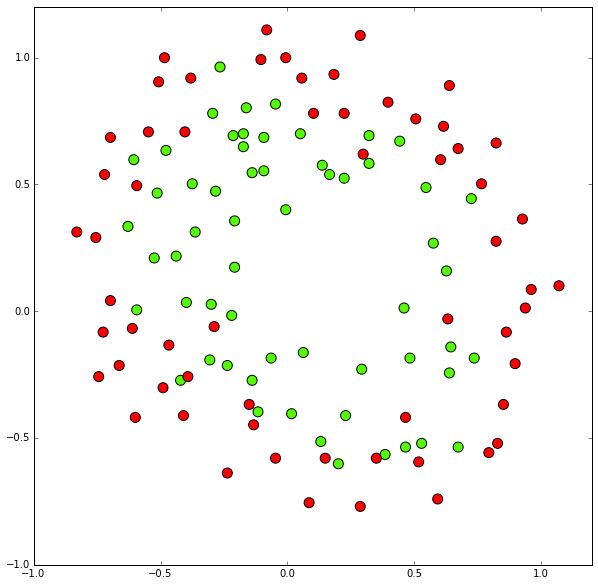

In [59]:

def powerme(x1,x2,n):
    X = []
    for m in range(n+1):
        for i in range(m+1):
            X.append(np.multiply(np.power(x1,i),np.power(x2,(m-i))))
    return np.hstack(X)

data = np.matrix(np.loadtxt("ex2data2.txt",delimiter=","))
np.random.shuffle(data)

X = powerme(data[:,0], data[:,1],n)
Y = data[:,2]

pl.figure(figsize=(10,10))
pl.scatter(X[:,2].tolist(),
               X[:,1].tolist(),
               c=Y.tolist(),
               s=100, cmap=pl.cm.get_cmap('prism'));

if sgd:
    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1],1)
    thetaBest = mbSGD(h, J, dJ, theta, X, Y, 
                       alpha=0.1, maxSteps=10000, batchSize = 10)

    xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.02),
                         np.arange(-1.5, 1.5, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l,1),yy.reshape(l,1),n)
    z = h(thetaBest, C).reshape(np.sqrt(l),np.sqrt(l))

    cont = pl.contour(xx, yy, z, levels=[0.5], lw=5);
pl.ylim(-1,1.2);
pl.xlim(-1,1.2);
pl.legend();

## A more difficult example: The MNIST task

<img style="margin: auto" src="http://pavel.surmenok.com/wp-content/uploads/2014/07/mnistdigits.gif"/> 

In [ ]:
import os
import struct

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure(figsize=(2,2))
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()
    
def toMatrix(data, maxItems=1000):
    datalist = [t for t in data]
    m = maxItems
    n = 28 * 28 + 1
    X = np.matrix(np.zeros(m * n)).reshape(m, n)
    Y = np.matrix(np.zeros(m)).reshape(m, 1)
    for i, (label, image) in enumerate(datalist[:m]):
        X[i, 0] = 1 # bias term
        X[i, 1:] = image.reshape(28*28,) / 255.0
        Y[i] = label
    return X, Y

## Reuse all the code

In [ ]:
mnistXTrain, mnistYTrain = toMatrix(read(dataset="training"), 
                                    maxItems=60000)
mnistYTrainI = indicatorMatrix(mnistYTrain)

mnistXTest, mnistYTest = toMatrix(read(dataset="testing"))
mnistYTestI = indicatorMatrix(mnistYTest)

n = mnistXTrain.shape[1]
k = mnistYTrainI.shape[1]

mnistTheta = np.matrix(np.random.normal(0, 0.1, n*k)).reshape(n,k)
mnistThetaBest = mbSGD(h_mc, J_mc, dJ_mc, mnistTheta, mnistXTrain, mnistYTrainI, 
                  alpha=0.1, maxSteps=20000, batchSize = 20)

In [ ]:
cls, probs = classify(mnistThetaBest, mnistXTest)
print("Accuracy: ", np.sum(cls == mnistYTest)/len(mnistYTest))

## Let's look at a few examples

In [ ]:
np.set_printoptions(precision=2)
for i, image in enumerate(mnistXTest[:10]):
    show(image[:,1:].reshape(28,28))
    print(cls[i], mnistYTest[i], probs[i])

# OK, but what about<br/> Neural Networks?

#### Actually, we already trained a whole bunch<br/> of neural networks during the lecture!

## The Neuron

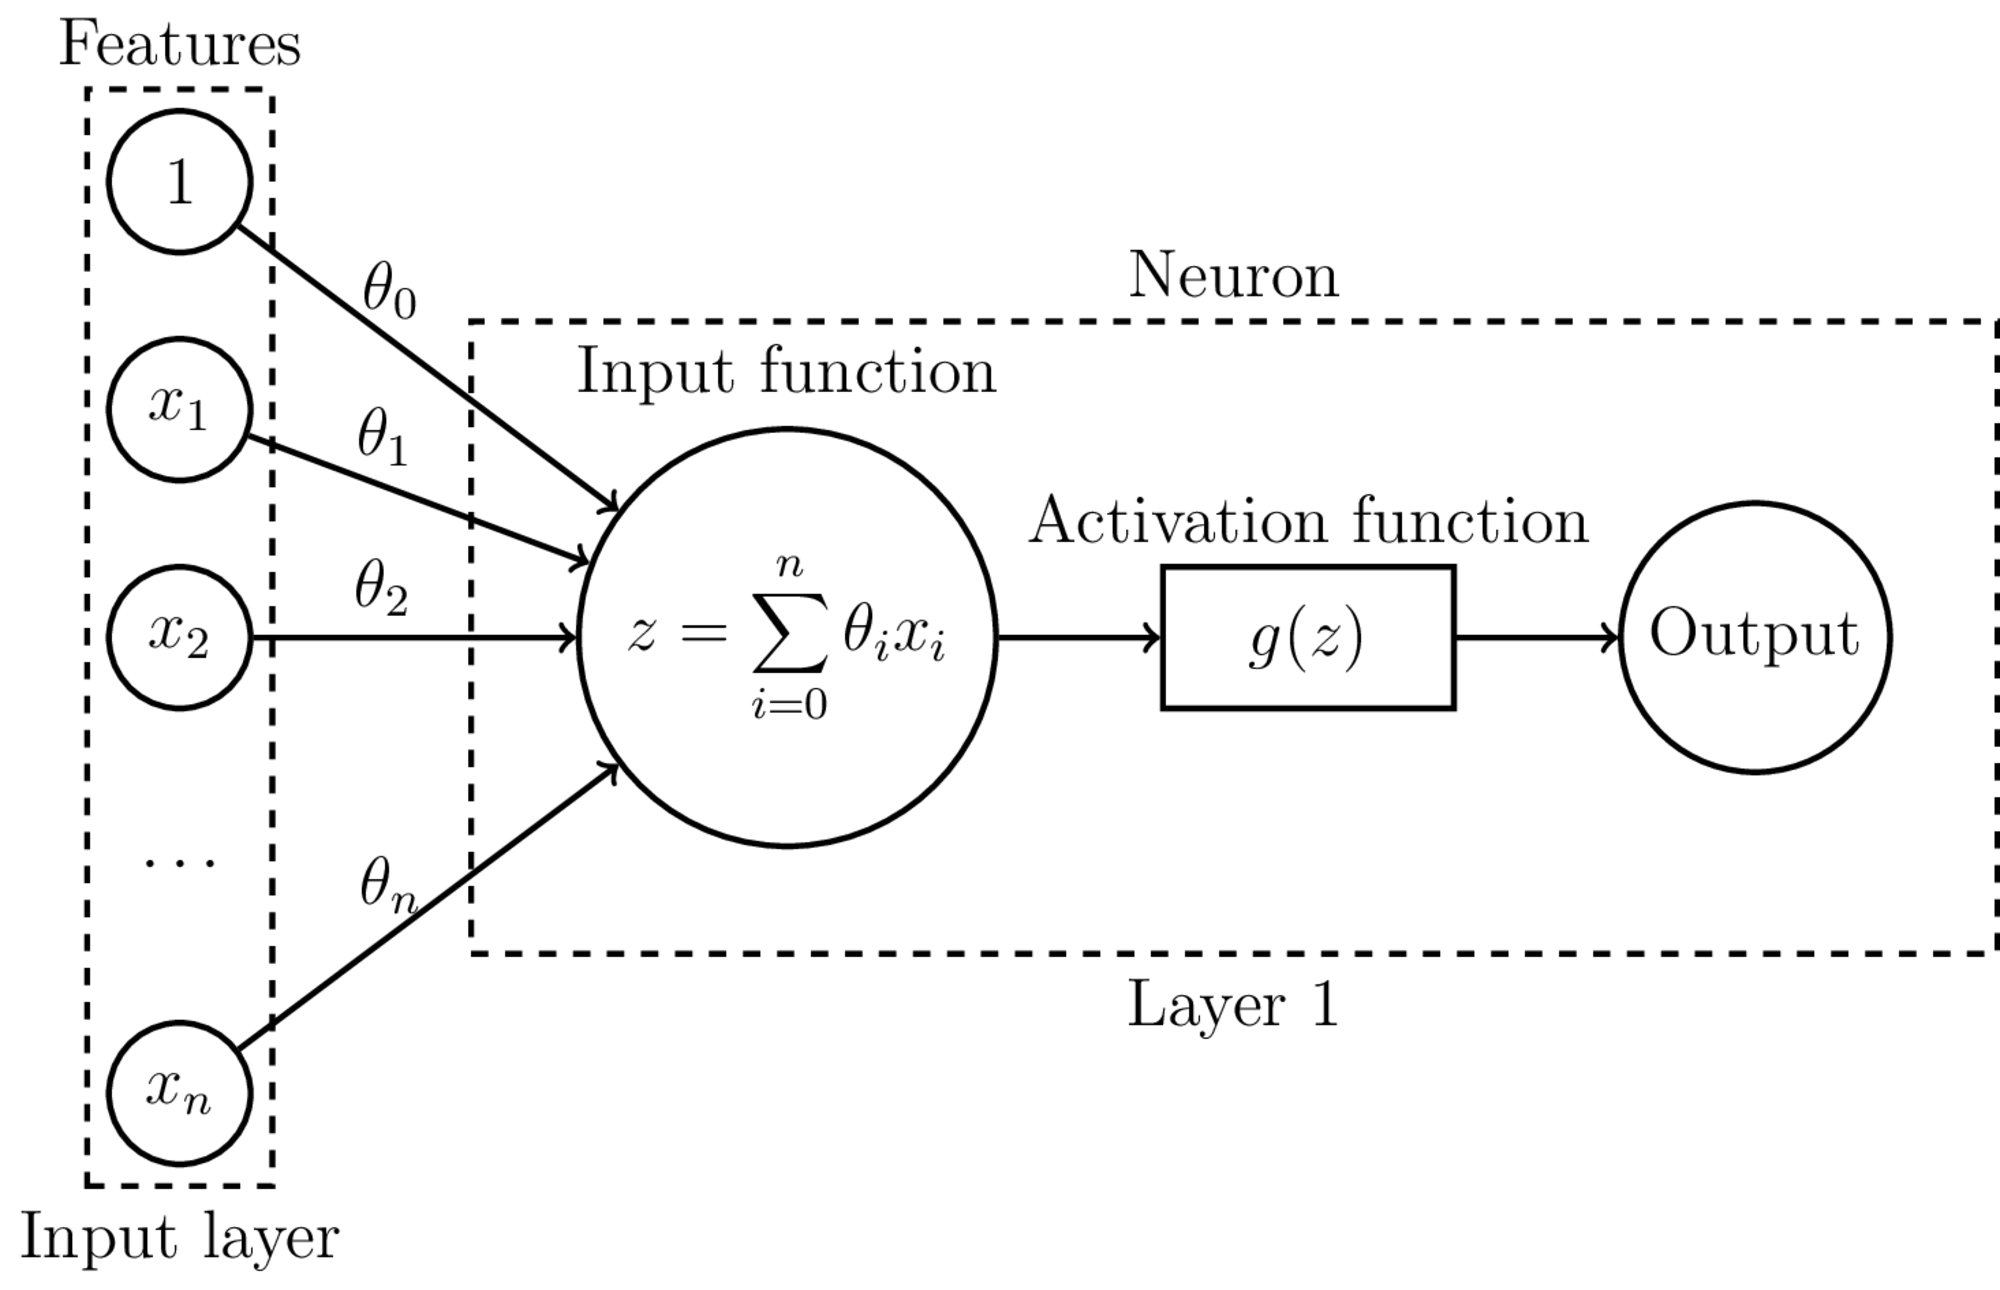

In [60]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Input function}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Activation function}] (g) [right=of sum] 
{$\quad g(z) \quad $};
\node[state] (output) [right=of g]  {Output};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Features, label=below:{Input layer}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Layer 1}, inner sep=0.65cm] {};

## What's this?

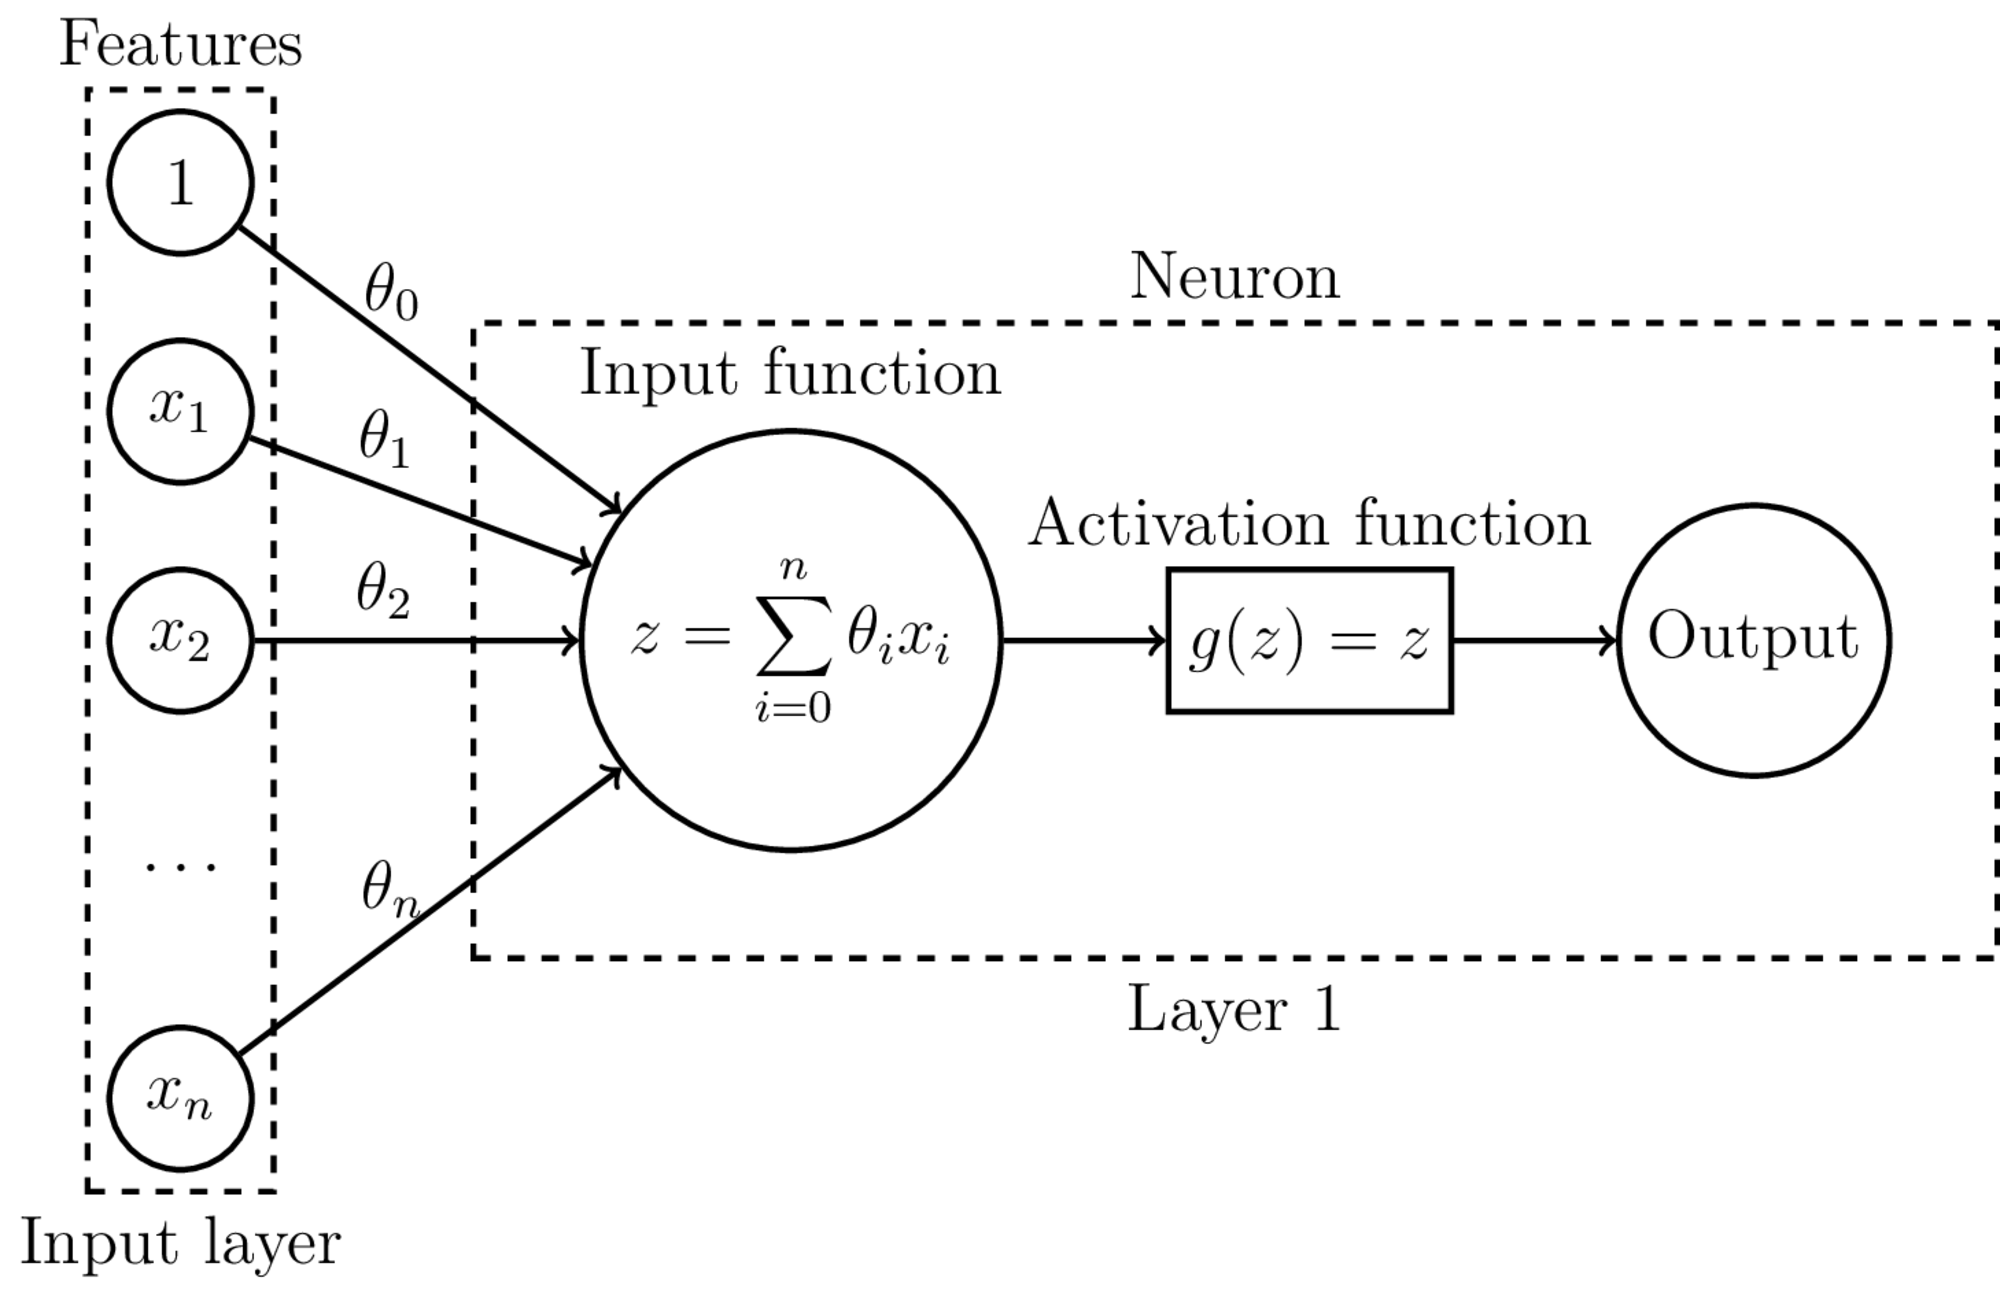

In [61]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Input function}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Activation function}] (g) [right=of sum] 
{$g(z) = z$};
\node[state] (output) [right=of g]  {Output};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Features, label=below:{Input layer}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Layer 1}, inner sep=0.65cm] {};

## All we need for a single-layer<br/> single-neuron regression network:

* Model: $$h_{\theta}(x) = \sum_{i=0}^n \theta_ix_i$$

* Cost function (MSE): $$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

* Gradient: $$\dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$ 

* Optimization algorithm: any variant of SGD

## And that?

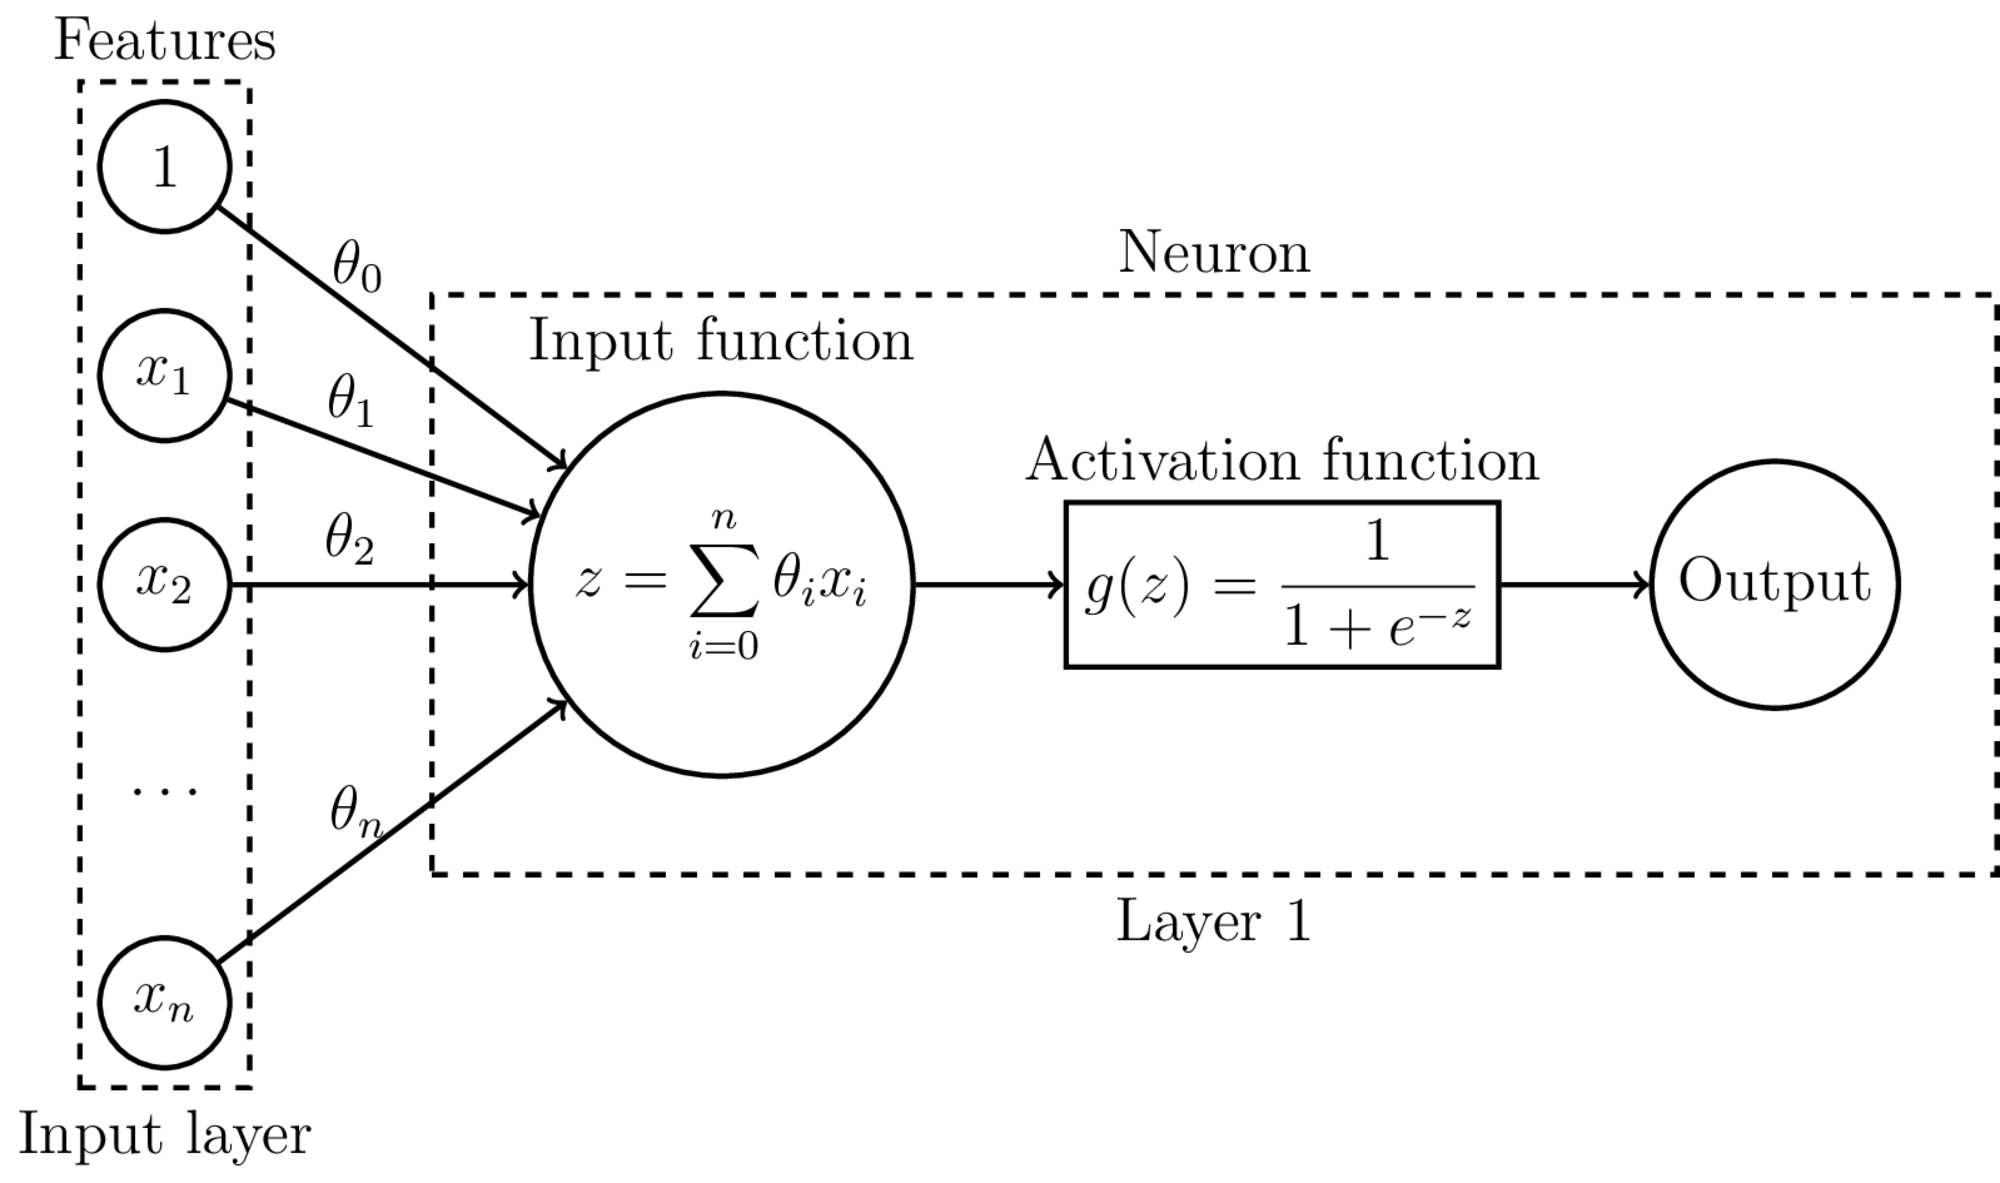

In [62]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Input function}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Activation function}] (g) [right=of sum] 
{$g(z) = \displaystyle\frac{1}{1+e^{-z}}$};
\node[state] (output) [right=of g]  {Output};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Features, label=below:{Input layer}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Layer 1}, inner sep=0.65cm] {};

## All we need for a single-layer <br/>single-neuron binary classifier:
* Model: $$h_{\theta}(x) = \sigma(\sum_{i=0}^n \theta_ix_i) = P(c=1|x,\theta)$$

* Cost function (binary cross-entropy): $$\begin{eqnarray} J(\theta) &=& -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log P(c=1|x^{(i)},\theta) \\ && + (1-y^{(i)})\log(1-P(c=1|x^{(i)},\theta))]\end{eqnarray}$$

* Gradient: $$\dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$ 

* Optimization algorithm: any variant of SGD

## And what are these?

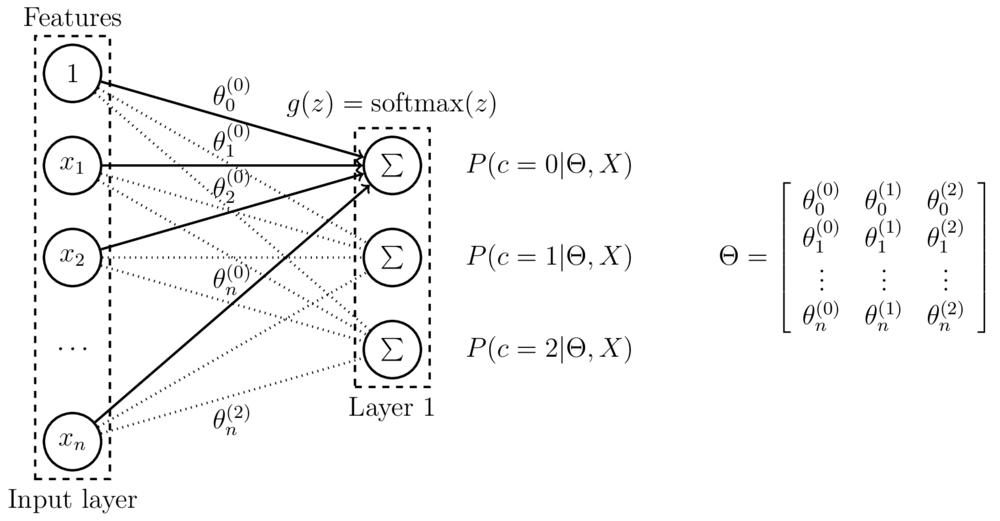

In [63]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (sum1) [right=4cm of x1] {$\sum$};
\node[state,circle] (sum2) [right=4cm of x2] {$\sum$};
\node[state,circle] (sum3) [right=4cm of dots] {$\sum$};

\node[state, draw=none,fill=none] (p1) [right=0.5cm of sum1] {$P(c=0|\Theta,X)$};
\node[state, draw=none,fill=none] (p2) [right=0.5cm of sum2] {$P(c=1|\Theta,X)$};
\node[state, draw=none,fill=none] (p3) [right=0.5cm of sum3] {$P(c=2|\Theta,X)$};

\path[->] 
(x0) edge node [above, pos=0.5] {$\theta^{(0)}_{0}$} (sum1)
(x1) edge node [above, pos=0.5] {$\theta^{(0)}_{1}$} (sum1)
(x2) edge node [above, pos=0.5] {$\theta^{(0)}_{2}$} (sum1)
(xn) edge node [above, pos=0.5] {$\theta^{(0)}_{n}$} (sum1);
                                     
\path[-, thin, dotted] 
(x0) edge node {} (sum2)
(x1) edge node {} (sum2)
(x2) edge node {} (sum2)
(xn) edge node {} (sum2)

(x0) edge node {} (sum3)
(x1) edge node {} (sum3)
(x2) edge node {} (sum3)
(xn) edge node [below, pos=0.5] {$\theta^{(2)}_{n}$} (sum3);
 
\node [draw, dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Features, label=below:{Input layer}] (w0) {};
\node [draw, dashed, fit= (sum1) (sum2) (sum3), label=below:{Layer 1}, label=above:{$g(z) = \mathrm{softmax}(z)$}] (w1) {};

\node[draw=none,fill=none] (theta) [right=1cm of p2] 
{$\Theta = \left[% 
        \begin{array}{ccc} %
        \theta_0^{(0)} & \theta_0^{(1)}  & \theta_0^{(2)} \\%
        \theta_1^{(0)} & \theta_1^{(1)}  & \theta_1^{(2)} \\%
        \vdots & \vdots & \vdots \\%
        \theta_n^{(0)} & \theta_n^{(1)}  & \theta_n^{(2)} \\%
        \end{array} \right]$
};


## All we need to train <br/>a single-layer multi-class classifier 

* Model:
$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c} \textrm{ where } \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

* Cost function $J(\Theta)$ (categorial cross-entropy):
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

* Gradient $\nabla J(\Theta)$:
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) x^{(i)}_j 
$$

* Optimization algorithm: any variant of SGD

## Tomorrow: How do we train this monster?

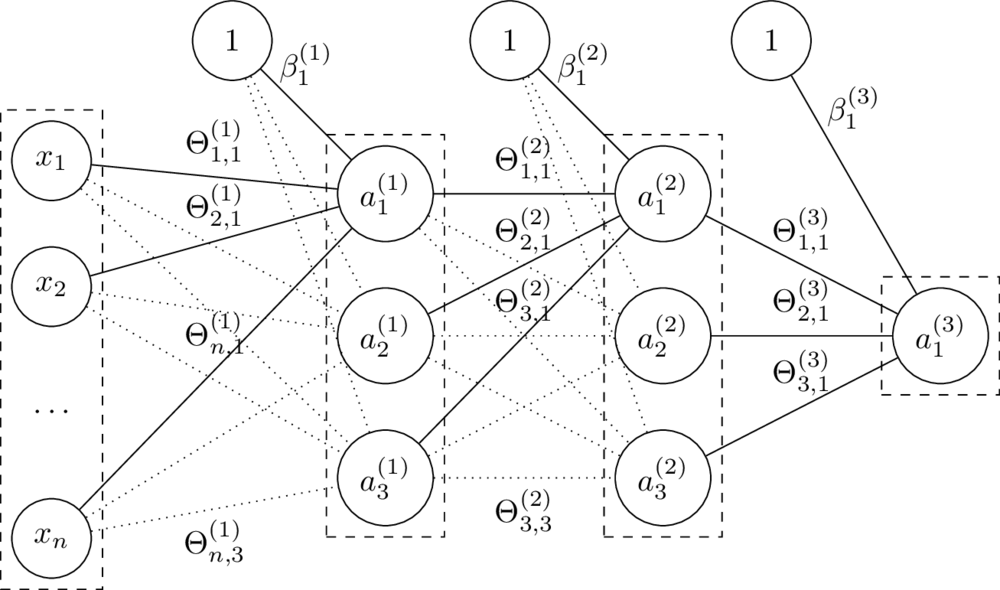

In [64]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600

\node[state] (x1) {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (a1) [below right=-0.33cm and 3cm of x1] {$a^{(1)}_1$};
\node[state,circle] (a2) [below=0.5cm of a1] {$a^{(1)}_2$};
\node[state,circle] (a3) [below=0.5cm of a2] {$a^{(1)}_3$};
\node[state] (b1) [above left=1cm and 1cm of a1] {$1$};

\node[state,circle] (a21) [right=2cm of a1] {$a^{(2)}_1$};
\node[state,circle] (a22) [below=0.5cm of a21] {$a^{(2)}_2$};
\node[state,circle] (a23) [below=0.5cm of a22] {$a^{(2)}_3$};
\node[state] (b2) [above left=1cm and 1cm of a21] {$1$};

\node[state,circle] (a31) [right=2cm of a22] {$a^{(3)}_1$};
\node[state] (b3) [right=2cm of b2] {$1$};

\path[-] 
(b1) edge node [above=.2cm, pos=0.5] {$\beta^{(1)}_{1}$} (a1)
(x1) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,1}$} (a1)
(x2) edge node [above, pos=0.5] {$\Theta^{(1)}_{2,1}$} (a1)
(xn) edge node [above, pos=0.5] {$\Theta^{(1)}_{n,1}$} (a1);
                                     
\path[-, thin, dotted] 
(b1) edge node {} (a2)
(x1) edge node {} (a2)
(x2) edge node {} (a2)
(xn) edge node {} (a2)

(b1) edge node {} (a3)
(x1) edge node {} (a3)
(x2) edge node {} (a3)
(xn) edge node [below, pos=0.5] {$\Theta^{(1)}_{n,3}$} (a3);

\path[-] 
(b2) edge node [above=.2cm, pos=0.5] {$\beta^{(2)}_{1}$} (a21)
(a1) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,1}$} (a21)
(a2) edge node [above, pos=0.5] {$\Theta^{(2)}_{2,1}$} (a21)
(a3) edge node [above, pos=0.5] {$\Theta^{(2)}_{3,1}$} (a21);

\path[-, thin, dotted] 
(b2) edge node {} (a22)
(a1) edge node {} (a22)
(a2) edge node {} (a22)
(a3) edge node {} (a22)

(b2) edge node {} (a23)
(a1) edge node {} (a23)
(a2) edge node {} (a23)
(a3) edge node [below, pos=0.5] {$\Theta^{(2)}_{3,3}$} (a23);

\path[-] 
(b3) edge node [above=.5cm, pos=0.5] {$\beta^{(3)}_{1}$} (a31)
(a21) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,1}$} (a31)
(a22) edge node [above, pos=0.5] {$\Theta^{(3)}_{2,1}$} (a31)
(a23) edge node [above, pos=0.5] {$\Theta^{(3)}_{3,1}$} (a31);

\node [draw, dashed, fit=  (x1) (x2) (dots) (xn)] (w0) {};
\node [draw, dashed, fit= (a1) (a2) (a3)] (w1) {};
\node [draw, dashed, fit= (a21) (a22) (a23)] (w2) {};
\node [draw, dashed, fit= (a31)] (w3) {};

## Or something like this:

<img style="margin: auto" src="https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2015/06/Figure2_NMT_system.png"/>